# Machine Learning Engineer Nanodegree Capstone Project

# Credit Card Fraud Detection

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score, make_scorer
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline

### Read data from csv dataset

In [2]:
data = pd.read_csv("creditcard.csv")

## Exploratory Data Analysis and Data Visualization 

In [3]:
print('This data  has {} rows and {} columns.'.format(data.shape[0], data.shape[1]))

This data  has 284807 rows and 31 columns.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
display(data.head(5))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
display(data.tail(5))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
display(data.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


###### Check for missing values

In [8]:
total_null = data.isnull().sum().sort_values(ascending = True)
percent_null = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = True)
display(pd.concat([total_null, percent_null], axis=1, keys=['Total nulls', 'Percent of nulls']).transpose())

,Time,V28,V27,V26,V25,V24,V23,V22,V21,V20,...,V8,V7,V6,V5,V4,V3,V2,V1,V14,Class
Total nulls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent of nulls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No missing values were found on data

###### Check data unbalance

In [9]:
#fraud vs. normal transactions 
total_count = data.Class.count()
counts = data.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%) out off {}.'.format(normal, perc_normal, fraudulent, perc_fraudulent,total_count))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%) out off 284807.


Text(0.5,0,'Class (0:Non-Fraudulent, 1:Fraudulent)')

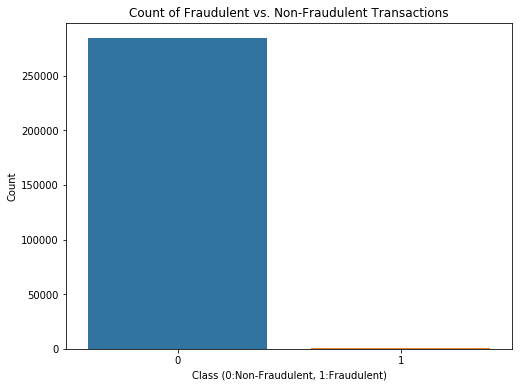

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

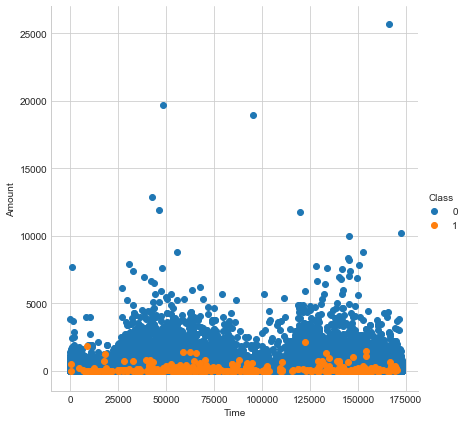

In [11]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

   From the above plot it is clearly visible that ,
   There are frauds only on the transactions which have transaction amount approximately less than 5000.
   The frauds in the transactions are evenly distributed throughout time.
   


###### Correlation Matrix between different features of the dataset

In [12]:
corr = data.corr()
display(corr)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


Text(0.5,1,'Heatmap of Correlation')

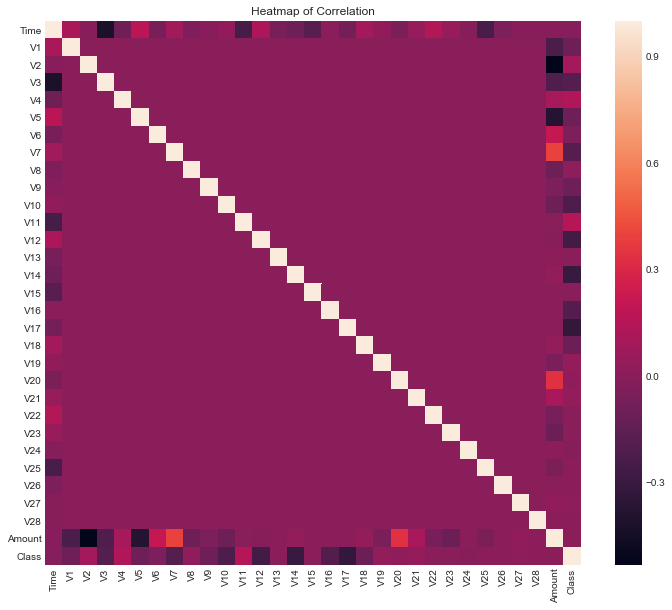

In [13]:
#heatmap
corr = data.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')


According to above Heatmap of Correlation, there is no notable correlation between features V1-V28. 
There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

In [14]:
#skewness
skew = data.skew()
display(skew)

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

<Figure size 432x288 with 0 Axes>

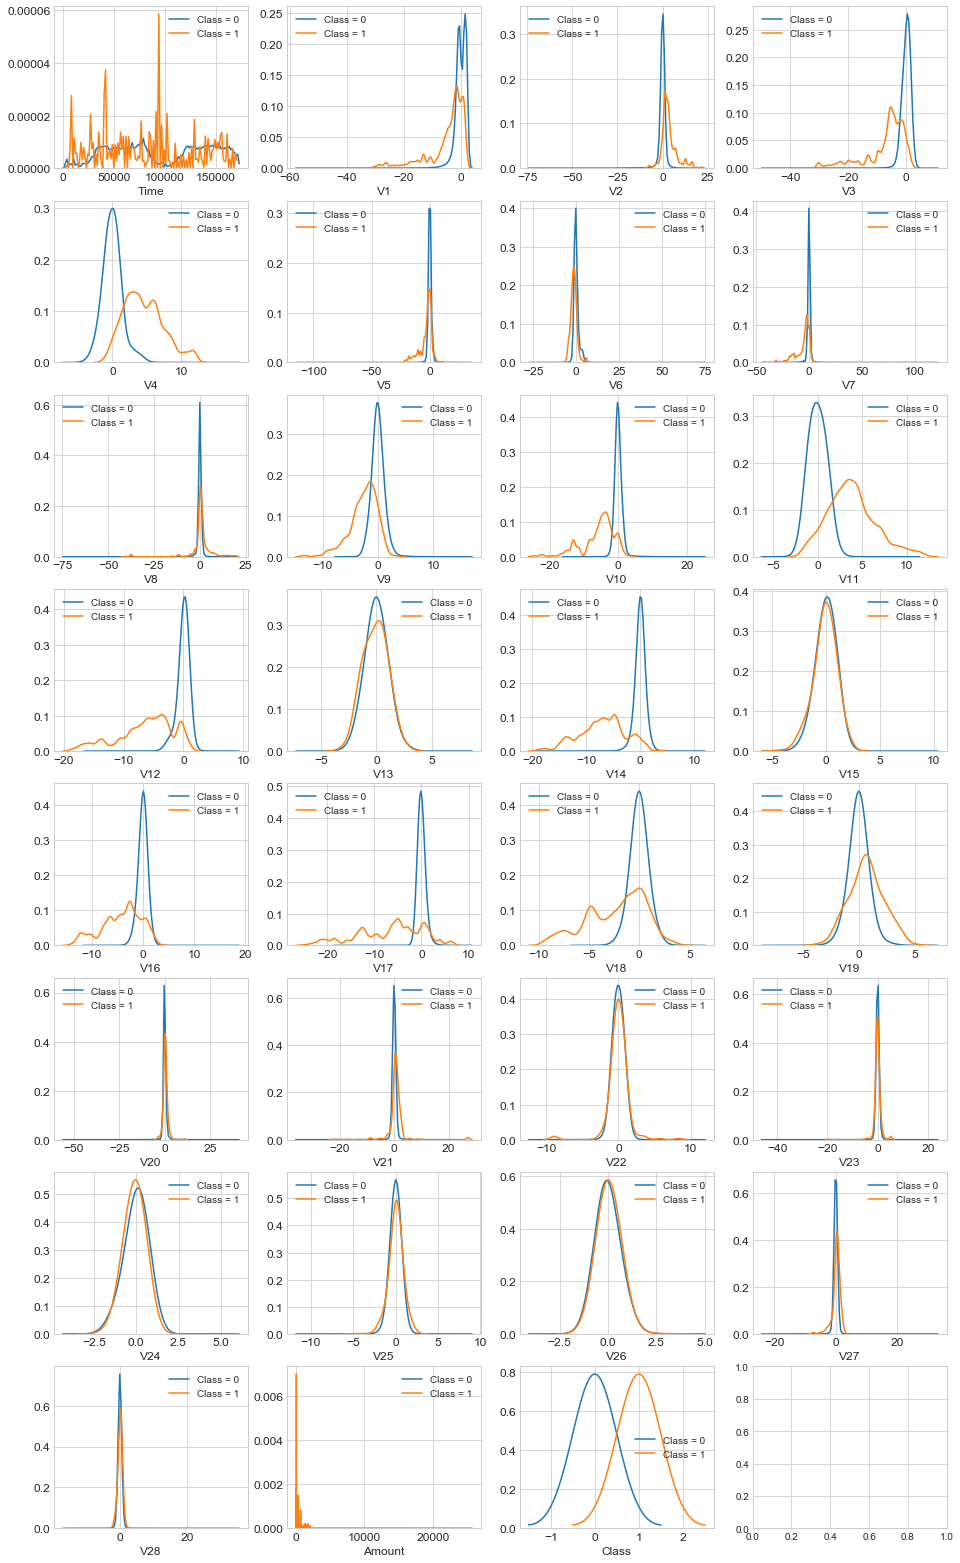

In [15]:
col_val = data.columns.values
index = 0
c0 = data.loc[data['Class'] == 0]
c1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in col_val:
    index += 1
    if(index <= col_val.shape[0]):
        plt.subplot(8,4,index)
        sns.kdeplot(c0[feature], bw=0.5,label="Class = 0")
        sns.kdeplot(c1[feature], bw=0.5,label="Class = 1")
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, Class: V12, V14,V16,V17,V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

# Data Preprocessing

###### Normalizing Numerical Features

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data['NormalAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['NormalTime'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
display(data.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,NormalAmount,NormalTime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.005824,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000105,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.014739,0.000006
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.004807,0.000006
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.002724,0.000012


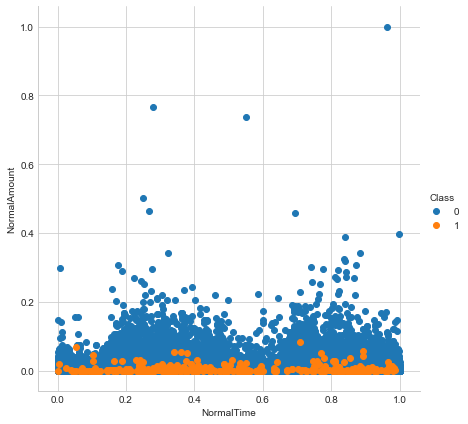

In [17]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "NormalTime", "NormalAmount").add_legend()
plt.show()

In [18]:
X= data.iloc[:,data.columns != "Class"]
y= data.iloc[:,data.columns=="Class"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [19]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

display(X_train.head(2))
display(y_train.head(2))
display(X_train.tail(2))
display(y_train.tail(2))

Training set has 199364 samples.
Testing set has 85443 samples.


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,NormalAmount,NormalTime
83767,-1.078976,1.602670,0.907686,0.127243,-0.706768,-1.178386,0.073434,0.607758,-0.931189,-0.835309,...,0.003471,-0.292907,0.185813,0.723813,-0.664617,-0.050384,-0.262499,0.036563,0.000077,0.347354
261280,2.163494,-0.336664,-1.906380,-0.703691,0.458860,-0.398080,-0.025092,-0.164611,0.410724,0.274851,...,0.142163,0.473239,-0.100250,-1.288542,0.057834,1.473650,-0.146334,-0.104812,0.000235,0.925639


,Class
83767,0
261280,0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,NormalAmount,NormalTime
26985,0.833102,-0.458544,-0.682415,1.180078,0.496093,0.499968,0.552388,-0.093385,0.059458,-0.169246,...,0.050051,-0.176118,-0.506395,-1.289488,0.878243,-0.170931,-0.018780,0.038638,0.009450,0.198713
14883,-0.382002,1.004071,1.244165,0.022709,0.113587,-0.543235,0.551118,0.131916,-0.221733,-0.520249,...,-0.250487,-0.670123,0.025069,-0.008949,-0.273588,0.105524,0.255052,0.092248,0.000069,0.151402


,Class
26985,0
14883,0


###### Over Sampling using SMOTE

In [20]:
smote = SMOTE(ratio='auto',kind='regular')
smote_X,smote_y = smote.fit_sample(X_train,y_train.values.ravel())
smote_data_X = pd.DataFrame(data=smote_X,columns=X_train.columns )
smote_data_Y= pd.DataFrame(data=smote_y,columns=["Class"])
smote_data = smote_data_X
smote_data["Class"] = smote_data_Y["Class"]

In [21]:
#fraud vs. normal transactions in SMOTE
smote_total_count = smote_data.Class.count()
smote_counts = smote_data.Class.value_counts()
smote_normal = smote_counts[0]
smote_fraudulent = smote_counts[1]
smote_perc_normal = (smote_normal/(smote_normal+smote_fraudulent))*100
smote_perc_fraudulent = (smote_fraudulent/(smote_normal+smote_fraudulent))*100
print('After SMOTE {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%) out off {}.'.format(smote_normal, smote_perc_normal, smote_fraudulent, smote_perc_fraudulent,smote_total_count))

After SMOTE 199029 non-fraudulent transactions (50.000%) and 199029 fraudulent transactions (50.000%) out off 398058.


Text(0.5,0,'Class (0:Non-Fraudulent, 1:Fraudulent)')

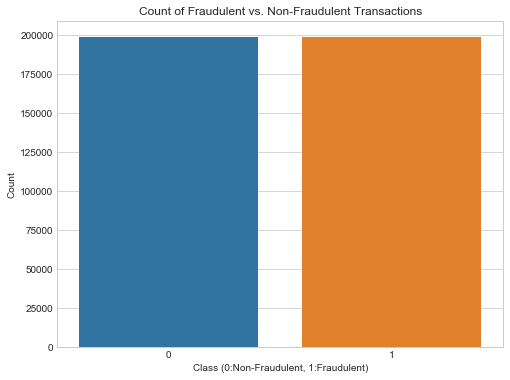

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(x=smote_counts.index, y=smote_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [23]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: class training set
       - X_test: features testing set
       - y_test: class testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
    
    # Compute precision on the training samples 
    results['auprc_train'] = average_precision_score(y_train,predictions_train)
    
    # Compute cross validation on the training set 
    auprc_scorer = make_scorer(average_precision_score)
    
    # Reshape the labels due to an indexing glitch
    #a,b = y_train.shape
    #y_train = y_train.iloc[0:,0].values.reshape(a,)
    
    results['auprc_cv'] = cross_val_score(learner, X_train, y_train,cv=3, scoring = auprc_scorer).mean()
        
    # Compute cross validation on the training set 
    recall_scorer = make_scorer(recall_score)
    results['recall_cv'] = cross_val_score(learner, X_train, y_train,cv=3, scoring = recall_scorer).mean()

    # Compute recall on the training samples 
    results['recall_train'] = recall_score(y_train,predictions_train)
    
    results['prc_precision'], results['prc_recall'], results['prc_thresholds'] = precision_recall_curve(y_train,predictions_train)
        
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [24]:
smote_X_train,smote_X_test,smote_y_train,smote_y_test = train_test_split(smote_X,smote_y,test_size=0.3)

In [25]:
# Initialize the four models
clf_A = LogisticRegression(solver='liblinear')
clf_B = DecisionTreeClassifier(random_state=42) 
clf_C = GaussianNB()
clf_D = MLPClassifier(hidden_layer_sizes=(50),random_state=0)
clf_E = XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, \
                max_depth = 5, alpha = 10, n_estimators = 10)

# TODO: Calculate the number of samples for 1%, 10%, 50% and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(smote_y_train)
samples_50 = int(samples_100*0.5)
samples_10 = int(samples_100*0.1)
samples_1 = int(samples_100*0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D,clf_E]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_50, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, smote_X_train, smote_y_train, smote_X_test, smote_y_test)

LogisticRegression trained on 2786 samples.
LogisticRegression trained on 27864 samples.
LogisticRegression trained on 139320 samples.
LogisticRegression trained on 278640 samples.
DecisionTreeClassifier trained on 2786 samples.
DecisionTreeClassifier trained on 27864 samples.
DecisionTreeClassifier trained on 139320 samples.
DecisionTreeClassifier trained on 278640 samples.
GaussianNB trained on 2786 samples.
GaussianNB trained on 27864 samples.
GaussianNB trained on 139320 samples.
GaussianNB trained on 278640 samples.


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier trained on 2786 samples.
MLPClassifier trained on 27864 samples.
MLPClassifier trained on 139320 samples.
MLPClassifier trained on 278640 samples.
XGBClassifier trained on 2786 samples.
XGBClassifier trained on 27864 samples.
XGBClassifier trained on 139320 samples.
XGBClassifier trained on 278640 samples.


In [28]:
for clf in [clf_A, clf_B, clf_C, clf_D,clf_E]:
    clf_name = clf.__class__.__name__
    print(clf_name)
    display(pd.DataFrame(results[clf_name])) 
    #for  key in results[clf_name].keys():
        #print("{},{}".format(key,results[clf_name][key]))
    print("--------")

LogisticRegression


,0,1,2,3
auprc_cv,0.935879,0.935879,0.935879,0.935879
auprc_train,0.932181,0.934621,0.935645,0.935873
prc_precision,"[0.5002978753947747, 0.9677232736534459, 1.0]","[0.5002978753947747, 0.9723030744042205, 1.0]","[0.5002978753947747, 0.9742879536133072, 1.0]","[0.5002978753947747, 0.9744694127584449, 1.0]"
prc_recall,"[1.0, 0.9239614642439545, 0.0]","[1.0, 0.9201667109029218, 0.0]","[1.0, 0.9184737774653343, 0.0]","[1.0, 0.9186028995071842, 0.0]"
prc_thresholds,"[0, 1]","[0, 1]","[0, 1]","[0, 1]"
pred_time,0.0319142,0.0293603,0.0259287,0.0309479
recall_cv,0.918546,0.918546,0.918546,0.918546
recall_train,0.923961,0.920167,0.918474,0.918603
train_time,1.13938,0.408049,3.26332,7.07999


--------
DecisionTreeClassifier


,0,1,2,3
auprc_cv,0.995032,0.995032,0.995032,0.995032
auprc_train,0.949228,0.982992,0.99658,1
prc_precision,"[0.5002978753947747, 0.9615024871391522, 1.0]","[0.5002978753947747, 0.9865885221706487, 1.0]","[0.5002978753947747, 0.9970504642655155, 1.0]","[1.0, 1.0]"
prc_recall,"[1.0, 0.9733865124853841, 0.0]","[1.0, 0.9926041763807092, 0.0]","[1.0, 0.9990531050264342, 0.0]","[1.0, 0.0]"
prc_thresholds,"[0, 1]","[0, 1]","[0, 1]",[1]
pred_time,0.0678184,0.0997677,0.0878203,0.094079
recall_cv,0.99835,0.99835,0.99835,0.99835
recall_train,0.973387,0.992604,0.999053,1
train_time,0.0479209,1.30992,10.1287,24.4011


--------
GaussianNB


,0,1,2,3
auprc_cv,0.904868,0.904868,0.904868,0.904868
auprc_train,0.90316,0.90493,0.90537,0.904884
prc_precision,"[0.5002978753947747, 0.9712863705972435, 1.0]","[0.5002978753947747, 0.973513990297447, 1.0]","[0.5002978753947747, 0.9739931857734637, 1.0]","[0.5002978753947747, 0.9734207603867259, 1.0]"
prc_recall,"[1.0, 0.8553546193410472, 0.0]","[1.0, 0.8550676814702697, 0.0]","[1.0, 0.8551322424911946, 0.0]","[1.0, 0.855139415937964, 0.0]"
prc_thresholds,"[0, 1]","[0, 1]","[0, 1]","[0, 1]"
pred_time,0.351958,0.375515,0.370044,0.367049
recall_cv,0.855161,0.855161,0.855161,0.855161
recall_train,0.855355,0.855068,0.855132,0.855139
train_time,0.00299287,0.0209441,0.102766,0.200465


--------
MLPClassifier


,0,1,2,3
auprc_cv,0.99914,0.99914,0.99914,0.99914
auprc_train,0.975007,0.997082,0.999398,0.999935
prc_precision,"[0.5002978753947747, 0.9794481203327448, 1.0]","[0.9970817746815344, 1.0]","[0.5002978753947747, 0.999455052594595, 1.0]","[0.9999354431469314, 1.0]"
prc_recall,"[1.0, 0.9907319067738858, 0.0]","[1.0, 0.0]","[1.0, 0.999885224851689, 0.0]","[1.0, 0.0]"
prc_thresholds,"[0, 1]",[1],"[0, 1]",[1]
pred_time,0.532227,0.587994,0.546379,0.577498
recall_cv,1,1,1,1
recall_train,0.990732,1,0.999885,1
train_time,2.70818,14.6172,42.5326,85.0238


--------
XGBClassifier


,0,1,2,3
auprc_cv,0.955549,0.955549,0.955549,0.955549
auprc_train,0.946458,0.957473,0.956513,0.956636
prc_precision,"[0.5002978753947747, 0.9870754921046939, 1.0]","[0.5002978753947747, 0.9952084331576425, 1.0]","[0.5002978753947747, 0.9955729570476043, 1.0]","[0.5002978753947747, 0.9954441560454035, 1.0]"
prc_recall,"[1.0, 0.9165584671778944, 0.0]","[1.0, 0.9237534342876409, 0.0]","[1.0, 0.9211351262167959, 0.0]","[1.0, 0.9216229205971177, 0.0]"
prc_thresholds,"[0, 1]","[0, 1]","[0, 1]","[0, 1]"
pred_time,0.447344,0.451329,0.453168,0.447966
recall_cv,0.920088,0.920088,0.920088,0.920088
recall_train,0.916558,0.923753,0.921135,0.921623
train_time,0.0584486,0.568011,3.11938,6.31679


--------


In [83]:
learner='LogisticRegression'
metric='train_time'
i=0
print("Result ={}".format(results[learner][i][metric]))

Result =1.13938307762146


K=0
learner=LogisticRegression
K=1
learner=DecisionTreeClassifier
K=2
learner=GaussianNB
K=3
learner=MLPClassifier
K=4
learner=XGBClassifier


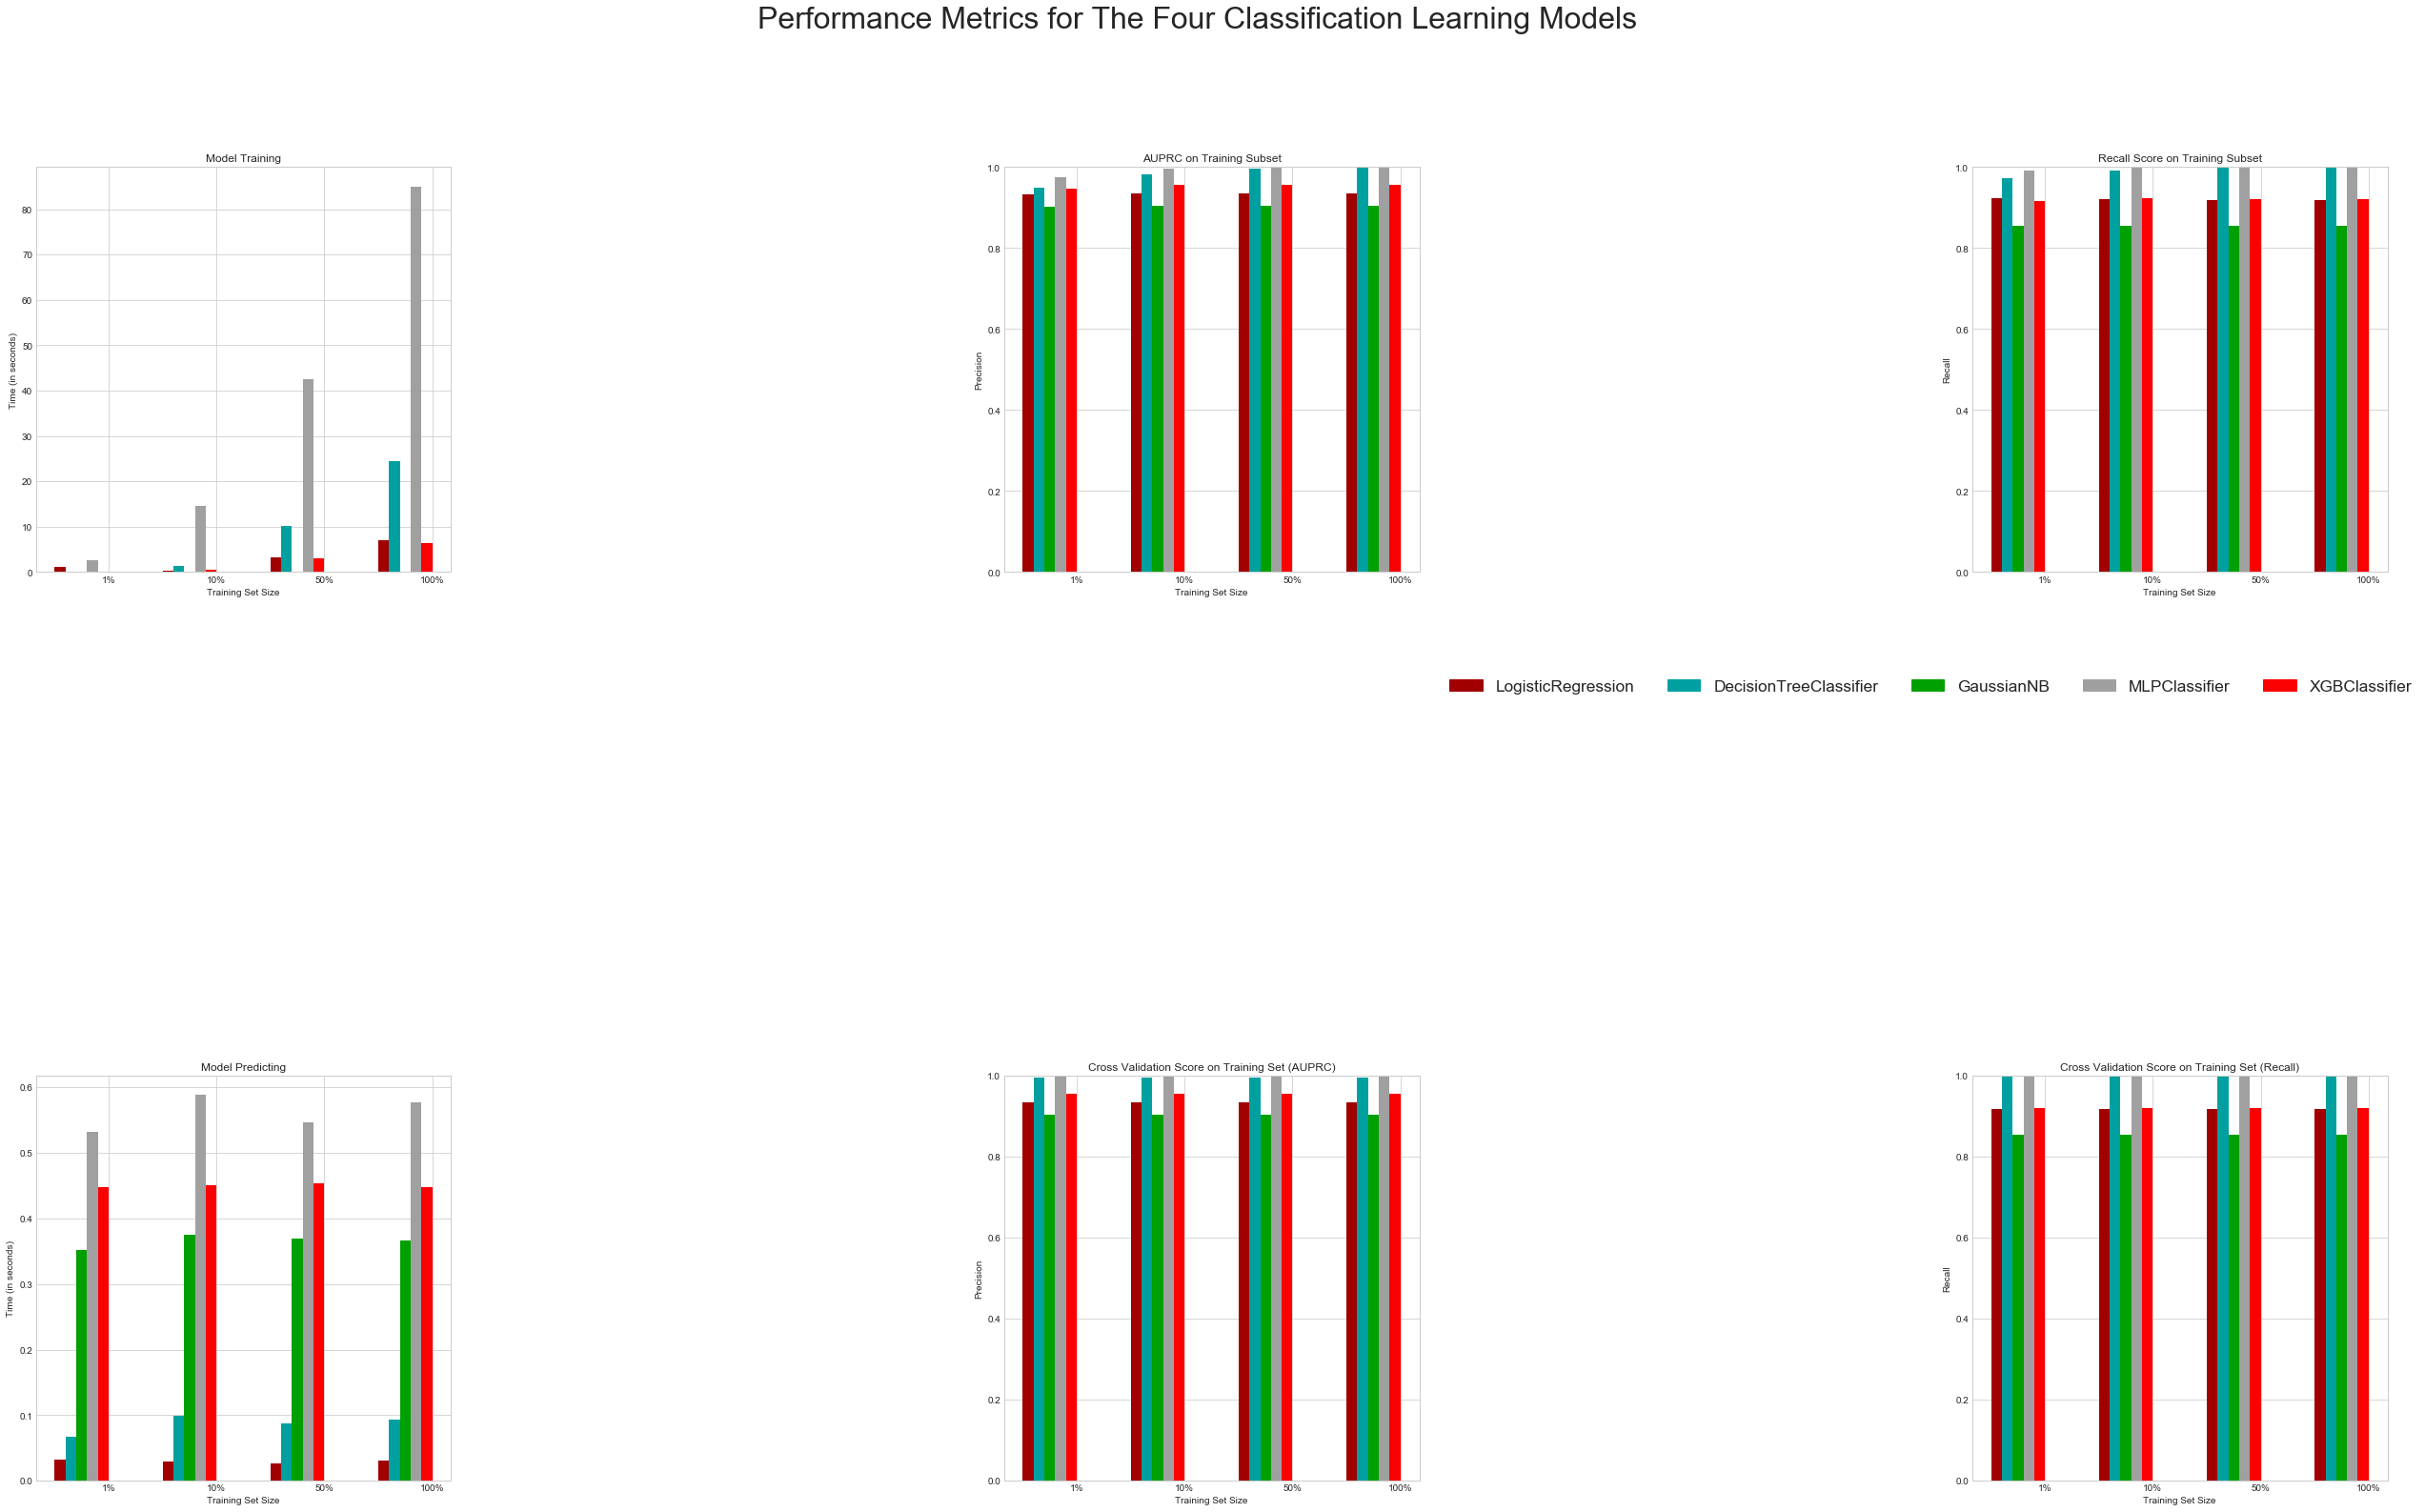

In [96]:
# evaluation metrics of benchmark model to be compared with the classifiers.
precision_benchmark = 1 #0.83
recall_benchmark = 1 #0.59
auprc_benchmark = 1 #0.71
#%load_ext autoreload
#%autoreload 2
%reload_ext autoreload
import Results_Visualizer as rv
rv.show_results(results, auprc_benchmark, recall_benchmark)
#import visuals as vs
#vs.evaluate(results, auprc_benchmark, recall_benchmark)

In [26]:
display((pd.DataFrame(results[clf_name]).transpose()).iloc[3]['prc_precision'])
display((pd.DataFrame(results[clf_name]).transpose()).iloc[3]['prc_recall'])

array([0.50029788, 0.99544416, 1.        ])

array([1.        , 0.92162292, 0.        ])

In [38]:
display((pd.DataFrame(results[clf_name])).iloc[3])

0    [1.0, 0.9165584671778944, 0.0]
1    [1.0, 0.9237534342876409, 0.0]
2    [1.0, 0.9211351262167959, 0.0]
3    [1.0, 0.9216229205971177, 0.0]
Name: prc_recall, dtype: object

In [54]:
def  draw_precision_recall_curve (recall ,precision,clf_name):
    plt.step(recall[0], precision[0], color='yellow', alpha=0.5,linewidth=1.5,label='samples_1')
    plt.step(recall[1], precision[1], color='blue', alpha=0.5,linewidth=1.5,label='samples_10')
    plt.step(recall[2], precision[2], color='green', alpha=0.5,linewidth=1.5,label='samples_50')
    plt.step(recall[3], precision[3], color='red', alpha=0.5,linewidth=1.5,label='samples_100')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve For {}'.format(clf_name))
    plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize = 'large')

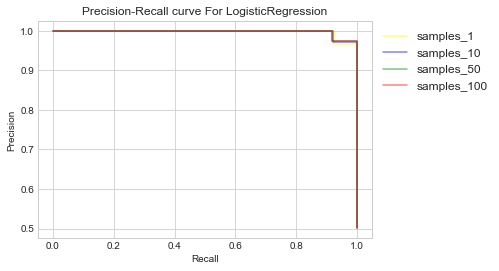

In [55]:
clf_name='LogisticRegression'
recall =(pd.DataFrame(results[clf_name])).iloc[3]
precision =(pd.DataFrame(results[clf_name])).iloc[2]
draw_precision_recall_curve (recall,precision,clf_name)

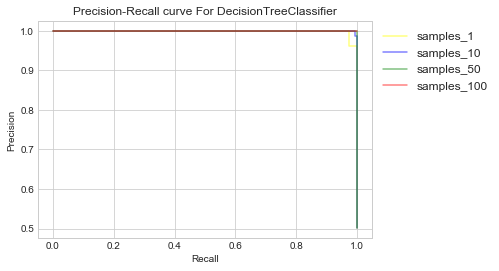

In [56]:
clf_name='DecisionTreeClassifier'
recall =(pd.DataFrame(results[clf_name])).iloc[3]
precision =(pd.DataFrame(results[clf_name])).iloc[2]
draw_precision_recall_curve (recall,precision,clf_name)

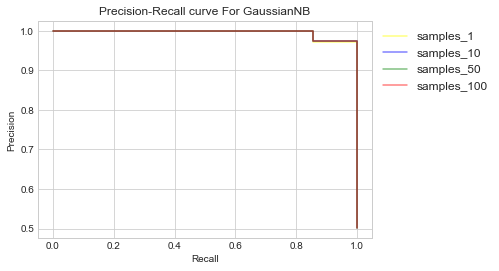

In [57]:
clf_name='GaussianNB'
recall =(pd.DataFrame(results[clf_name])).iloc[3]
precision =(pd.DataFrame(results[clf_name])).iloc[2]
draw_precision_recall_curve (recall,precision,clf_name)

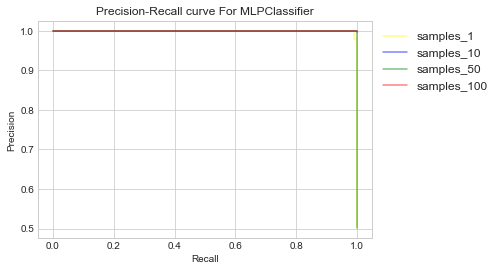

In [58]:
clf_name='MLPClassifier'
recall =(pd.DataFrame(results[clf_name])).iloc[3]
precision =(pd.DataFrame(results[clf_name])).iloc[2]
draw_precision_recall_curve (recall,precision,clf_name)

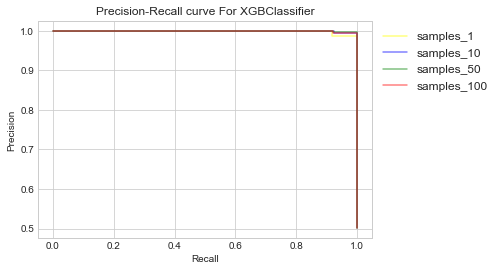

In [59]:
clf_name='XGBClassifier'
recall =(pd.DataFrame(results[clf_name])).iloc[3]
precision =(pd.DataFrame(results[clf_name])).iloc[2]
draw_precision_recall_curve (recall,precision,clf_name)

LogisticRegression
--------
DecisionTreeClassifier
--------
GaussianNB
--------
MLPClassifier
--------
XGBClassifier
--------


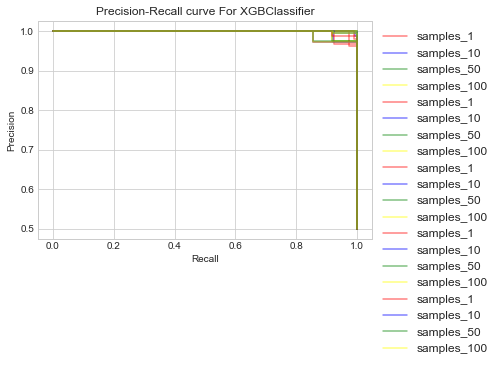

In [51]:
for clf in [clf_A, clf_B, clf_C, clf_D,clf_E]:
    clf_name = clf.__class__.__name__
    print(clf_name)
    #display(pd.DataFrame(results[clf_name]))
    recall =(pd.DataFrame(results[clf_name])).iloc[3]
    precision =(pd.DataFrame(results[clf_name])).iloc[2]
    draw_precision_recall_curve (recall,precision,clf_name)
    #for  key in results[clf_name].keys():
        #print("{},{}".format(key,results[clf_name][key]))
    print("--------")

